# Shopee Logistics Performance: Data Analytics Challenge (SCL 2020)

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("delivery_orders_march.csv")
sla_matrix = pd.read_excel("SLA_matrix.xlsx")

In [3]:
data

,orderid,pick,1st_deliver_attempt,2nd_deliver_attempt,buyeraddress,selleraddress
0,2215676524,1583138397,1.583385e+09,NaN,"Baging ldl BUENAVISTA,PATAG.CAGAYAN Buagsong,c...",Pantranco vill. 417 Warehouse# katipunan 532 (...
1,2219624609,1583309968,1.583463e+09,1.583799e+09,coloma's quzom CASANAS Site1 Masiyan 533A Stol...,"BLDG 210A Moras C42B 2B16,168 church) Complex ..."
2,2220979489,1583306434,1.583460e+09,NaN,"21-O LumangDaan,Capitangan,Abucay,Bataan .Bign...","#66 150-C, DRIVE, Milagros Joe socorro Metro M..."
3,2221066352,1583419016,1.583556e+09,NaN,"616Espiritu MARTINVILLE,MANUYO #5paraiso kengi...","999maII 201,26 Villaruel Barretto gen.t number..."
4,2222478803,1583318305,1.583480e+09,NaN,L042 Summerbreezee1 L2(Balanay analyn Lot760 C...,G66MANILA Hiyas Fitness MAYSILO magdiwang Lt.4...
...,...,...,...,...,...,...
3176308,31504087640510,1585821728,1.585978e+09,NaN,"mayapis. edeliza JC274 5542 brgy.Dita, Metro M...",Intimate St) compound. Sekiat 2B8 98-B Mel far...
3176309,31504147352227,1585895011,1.586179e+09,1.586232e+09,"Superdome PORKY K307 Libertad, PCGCC sub.bagui...","13th 3616 Pilipinas, :1v26 1f-5 (Village) bl10..."
3176310,31504462290482,1585826951,1.585965e+09,NaN,Galay's 1republic 333-18 Diliman 74d Malbay fe...,"Lane, 379B 1739A Ivc AFPFC Cainta, Waterpark, ..."
3176311,31504851495943,1585891194,1.586230e+09,NaN,"#4560, 80south biloca vi!!age KM21, MANRESA, ,...",lrt-2 Consolacion 224-A Paradise 6D 36st champ...


In [4]:
sla_matrix

,1st Attempt SLA\n(Working Days),Unnamed: 1,Destination (Buyer),Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,Metro Manila,Luzon,Visayas,Mindanao
1,Origin\n(Seller),Metro Manila,3 working days,5 working days,7 working days,7 working days
2,NaN,Luzon,5 working days,5 working days,7 working days,7 working days
3,NaN,Visayas,7 working days,7 working days,7 working days,7 working days
4,NaN,Mindanao,7 working days,7 working days,7 working days,7 working days
5,NaN,NaN,NaN,NaN,NaN,NaN
6,"Working Days are defined as Mon - Sat, Excludi...",NaN,NaN,NaN,NaN,NaN
7,SLA calculation begins from the next day after...,NaN,NaN,NaN,NaN,NaN
8,2nd Attempt must be no later than 3 working da...,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3176313 entries, 0 to 3176312
Data columns (total 6 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   orderid              3176313 non-null  int64  
 1   pick                 3176313 non-null  int64  
 2   1st_deliver_attempt  3176313 non-null  float64
 3   2nd_deliver_attempt  1357002 non-null  float64
 4   buyeraddress         3176313 non-null  object 
 5   selleraddress        3176313 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 145.4+ MB


# Feature Engineering

First things first, I have to convert all time formats are stored in epoch time based on Local Time (GMT+8). Due to GMT+8 has "Offset In seconds" equals to +28800, so I have to add 28800 to all of time columns (pick, 1st_deliver_attempt, and 2nd_deliver_attempt).

In [6]:
logistics = data.copy()

In [7]:
logistics[["pick", "1st_deliver_attempt", "2nd_deliver_attempt"]] += 28800

Then, I have to convert all of time columns to readable date.

In [8]:
logistics["pick"] = pd.to_datetime(logistics["pick"], unit = "s").dt.date
logistics["1st_deliver_attempt"] = pd.to_datetime(logistics["1st_deliver_attempt"], unit = "s").dt.date
logistics["2nd_deliver_attempt"] = pd.to_datetime(logistics["2nd_deliver_attempt"], unit = "s").dt.date

In [9]:
logistics

,orderid,pick,1st_deliver_attempt,2nd_deliver_attempt,buyeraddress,selleraddress
0,2215676524,2020-03-02,2020-03-05,NaT,"Baging ldl BUENAVISTA,PATAG.CAGAYAN Buagsong,c...",Pantranco vill. 417 Warehouse# katipunan 532 (...
1,2219624609,2020-03-04,2020-03-06,2020-03-10,coloma's quzom CASANAS Site1 Masiyan 533A Stol...,"BLDG 210A Moras C42B 2B16,168 church) Complex ..."
2,2220979489,2020-03-04,2020-03-06,NaT,"21-O LumangDaan,Capitangan,Abucay,Bataan .Bign...","#66 150-C, DRIVE, Milagros Joe socorro Metro M..."
3,2221066352,2020-03-05,2020-03-07,NaT,"616Espiritu MARTINVILLE,MANUYO #5paraiso kengi...","999maII 201,26 Villaruel Barretto gen.t number..."
4,2222478803,2020-03-04,2020-03-06,NaT,L042 Summerbreezee1 L2(Balanay analyn Lot760 C...,G66MANILA Hiyas Fitness MAYSILO magdiwang Lt.4...
...,...,...,...,...,...,...
3176308,31504087640510,2020-04-02,2020-04-04,NaT,"mayapis. edeliza JC274 5542 brgy.Dita, Metro M...",Intimate St) compound. Sekiat 2B8 98-B Mel far...
3176309,31504147352227,2020-04-03,2020-04-06,2020-04-07,"Superdome PORKY K307 Libertad, PCGCC sub.bagui...","13th 3616 Pilipinas, :1v26 1f-5 (Village) bl10..."
3176310,31504462290482,2020-04-02,2020-04-04,NaT,Galay's 1republic 333-18 Diliman 74d Malbay fe...,"Lane, 379B 1739A Ivc AFPFC Cainta, Waterpark, ..."
3176311,31504851495943,2020-04-03,2020-04-07,NaT,"#4560, 80south biloca vi!!age KM21, MANRESA, ,...",lrt-2 Consolacion 224-A Paradise 6D 36st champ...


I also have to replace all of nonexistent times (NaT) in 2nd_deliver_attempt column to zero value.

In [10]:
logistics["2nd_deliver_attempt"] = logistics["2nd_deliver_attempt"].replace(np.nan, 0)

In [11]:
logistics

,orderid,pick,1st_deliver_attempt,2nd_deliver_attempt,buyeraddress,selleraddress
0,2215676524,2020-03-02,2020-03-05,0,"Baging ldl BUENAVISTA,PATAG.CAGAYAN Buagsong,c...",Pantranco vill. 417 Warehouse# katipunan 532 (...
1,2219624609,2020-03-04,2020-03-06,2020-03-10,coloma's quzom CASANAS Site1 Masiyan 533A Stol...,"BLDG 210A Moras C42B 2B16,168 church) Complex ..."
2,2220979489,2020-03-04,2020-03-06,0,"21-O LumangDaan,Capitangan,Abucay,Bataan .Bign...","#66 150-C, DRIVE, Milagros Joe socorro Metro M..."
3,2221066352,2020-03-05,2020-03-07,0,"616Espiritu MARTINVILLE,MANUYO #5paraiso kengi...","999maII 201,26 Villaruel Barretto gen.t number..."
4,2222478803,2020-03-04,2020-03-06,0,L042 Summerbreezee1 L2(Balanay analyn Lot760 C...,G66MANILA Hiyas Fitness MAYSILO magdiwang Lt.4...
...,...,...,...,...,...,...
3176308,31504087640510,2020-04-02,2020-04-04,0,"mayapis. edeliza JC274 5542 brgy.Dita, Metro M...",Intimate St) compound. Sekiat 2B8 98-B Mel far...
3176309,31504147352227,2020-04-03,2020-04-06,2020-04-07,"Superdome PORKY K307 Libertad, PCGCC sub.bagui...","13th 3616 Pilipinas, :1v26 1f-5 (Village) bl10..."
3176310,31504462290482,2020-04-02,2020-04-04,0,Galay's 1republic 333-18 Diliman 74d Malbay fe...,"Lane, 379B 1739A Ivc AFPFC Cainta, Waterpark, ..."
3176311,31504851495943,2020-04-03,2020-04-07,0,"#4560, 80south biloca vi!!age KM21, MANRESA, ,...",lrt-2 Consolacion 224-A Paradise 6D 36st champ...


After tackle the time columns, I have to deal with the address columns (buyeraddress and selleraddres) in order to extract the address. Let's take a look at how the address is written in both of these columns.

In [12]:
logistics["selleraddress"][0]

'Pantranco vill. 417 Warehouse# katipunan 532 (UNIT Metro Manila'

In [13]:
logistics["buyeraddress"][0]

'Baging ldl BUENAVISTA,PATAG.CAGAYAN Buagsong,cordova,cebu Mt.VERNON Buolding, Habagat Lordman NATL Metro Manila'

It seems that the last part of the address is what I'm looking for.

In [14]:
logistics.selleraddress = logistics.selleraddress.apply(lambda l: l.split()[-1].title())
logistics.buyeraddress = logistics.buyeraddress.apply(lambda l: l.split()[-1].title())

In [15]:
logistics

,orderid,pick,1st_deliver_attempt,2nd_deliver_attempt,buyeraddress,selleraddress
0,2215676524,2020-03-02,2020-03-05,0,Manila,Manila
1,2219624609,2020-03-04,2020-03-06,2020-03-10,Manila,Manila
2,2220979489,2020-03-04,2020-03-06,0,Manila,Manila
3,2221066352,2020-03-05,2020-03-07,0,Manila,Manila
4,2222478803,2020-03-04,2020-03-06,0,Luzon,Manila
...,...,...,...,...,...,...
3176308,31504087640510,2020-04-02,2020-04-04,0,Manila,Manila
3176309,31504147352227,2020-04-03,2020-04-06,2020-04-07,Manila,Manila
3176310,31504462290482,2020-04-02,2020-04-04,0,Manila,Manila
3176311,31504851495943,2020-04-03,2020-04-07,0,Luzon,Manila


Let's take a look at all the Seller locations and Buyer locations.

In [16]:
logistics.selleraddress.value_counts()

Manila    3176312
Luzon           1
Name: selleraddress, dtype: int64

In [17]:
logistics.buyeraddress.value_counts()

Manila      1560698
Luzon        804888
Visayas      479595
Mindanao     331132
Name: buyeraddress, dtype: int64

It turn out almost all the Seller locations is located in Manila and only one Seller that located in Luzon. On the other hand, the Buyer locations is located in all of locations that are listed in SLA_matrix.xlsx file.

After know where the Seller locations and the Buyer locations, I could make one added column (days_limit) that will give delivery days limit information based on the Service Level Agreements (SLA).

In [18]:
days = []
for seller, buyer in logistics[["selleraddress", "buyeraddress"]].itertuples(index = False):
    if seller == "Manila" and buyer == "Manila":
        days.append(3)
    elif (seller == "Manila" and buyer == "Luzon") or (seller == "Luzon" and
                                                       (buyer == "Manila" or buyer == "Luzon")):
        days.append(5)
    else:
        days.append(7)

logistics["days_limit"] = days

In [19]:
logistics

,orderid,pick,1st_deliver_attempt,2nd_deliver_attempt,buyeraddress,selleraddress,days_limit
0,2215676524,2020-03-02,2020-03-05,0,Manila,Manila,3
1,2219624609,2020-03-04,2020-03-06,2020-03-10,Manila,Manila,3
2,2220979489,2020-03-04,2020-03-06,0,Manila,Manila,3
3,2221066352,2020-03-05,2020-03-07,0,Manila,Manila,3
4,2222478803,2020-03-04,2020-03-06,0,Luzon,Manila,5
...,...,...,...,...,...,...,...
3176308,31504087640510,2020-04-02,2020-04-04,0,Manila,Manila,3
3176309,31504147352227,2020-04-03,2020-04-06,2020-04-07,Manila,Manila,3
3176310,31504462290482,2020-04-02,2020-04-04,0,Manila,Manila,3
3176311,31504851495943,2020-04-03,2020-04-07,0,Luzon,Manila,5


# Logistics Performance Analysis

Logistics performance analysis below follows the basic concepts of task from the challenge.

In [20]:
public_holidays = ['2020-03-25', '2020-03-30', '2020-03-31']

logistics["1st_attempt_days"] = np.busday_count(logistics['pick'], logistics['1st_deliver_attempt'], 
                                           weekmask = '1111110', holidays = public_holidays)
logistics["2nd_attempt_days"] = np.busday_count(logistics['1st_deliver_attempt'], 
                                                logistics['2nd_deliver_attempt'], 
                                                weekmask = '1111110', holidays = public_holidays)

In [21]:
logistics

,orderid,pick,1st_deliver_attempt,2nd_deliver_attempt,buyeraddress,selleraddress,days_limit,1st_attempt_days,2nd_attempt_days
0,2215676524,2020-03-02,2020-03-05,0,Manila,Manila,3,3,-15708
1,2219624609,2020-03-04,2020-03-06,2020-03-10,Manila,Manila,3,2,3
2,2220979489,2020-03-04,2020-03-06,0,Manila,Manila,3,2,-15709
3,2221066352,2020-03-05,2020-03-07,0,Manila,Manila,3,2,-15710
4,2222478803,2020-03-04,2020-03-06,0,Luzon,Manila,5,2,-15709
...,...,...,...,...,...,...,...,...,...
3176308,31504087640510,2020-04-02,2020-04-04,0,Manila,Manila,3,2,-15731
3176309,31504147352227,2020-04-03,2020-04-06,2020-04-07,Manila,Manila,3,2,1
3176310,31504462290482,2020-04-02,2020-04-04,0,Manila,Manila,3,2,-15731
3176311,31504851495943,2020-04-03,2020-04-07,0,Luzon,Manila,5,3,-15733


In [22]:
logistics["is_late"] = (logistics["1st_attempt_days"]
                        > logistics["days_limit"]) | (logistics["2nd_attempt_days"] > 3)

In [23]:
logistics

,orderid,pick,1st_deliver_attempt,2nd_deliver_attempt,buyeraddress,selleraddress,days_limit,1st_attempt_days,2nd_attempt_days,is_late
0,2215676524,2020-03-02,2020-03-05,0,Manila,Manila,3,3,-15708,False
1,2219624609,2020-03-04,2020-03-06,2020-03-10,Manila,Manila,3,2,3,False
2,2220979489,2020-03-04,2020-03-06,0,Manila,Manila,3,2,-15709,False
3,2221066352,2020-03-05,2020-03-07,0,Manila,Manila,3,2,-15710,False
4,2222478803,2020-03-04,2020-03-06,0,Luzon,Manila,5,2,-15709,False
...,...,...,...,...,...,...,...,...,...,...
3176308,31504087640510,2020-04-02,2020-04-04,0,Manila,Manila,3,2,-15731,False
3176309,31504147352227,2020-04-03,2020-04-06,2020-04-07,Manila,Manila,3,2,1,False
3176310,31504462290482,2020-04-02,2020-04-04,0,Manila,Manila,3,2,-15731,False
3176311,31504851495943,2020-04-03,2020-04-07,0,Luzon,Manila,5,3,-15733,False


In [24]:
logistics["is_late"] = logistics["is_late"].map({True: "Late", False: "Not Late"})
logistics

,orderid,pick,1st_deliver_attempt,2nd_deliver_attempt,buyeraddress,selleraddress,days_limit,1st_attempt_days,2nd_attempt_days,is_late
0,2215676524,2020-03-02,2020-03-05,0,Manila,Manila,3,3,-15708,Not Late
1,2219624609,2020-03-04,2020-03-06,2020-03-10,Manila,Manila,3,2,3,Not Late
2,2220979489,2020-03-04,2020-03-06,0,Manila,Manila,3,2,-15709,Not Late
3,2221066352,2020-03-05,2020-03-07,0,Manila,Manila,3,2,-15710,Not Late
4,2222478803,2020-03-04,2020-03-06,0,Luzon,Manila,5,2,-15709,Not Late
...,...,...,...,...,...,...,...,...,...,...
3176308,31504087640510,2020-04-02,2020-04-04,0,Manila,Manila,3,2,-15731,Not Late
3176309,31504147352227,2020-04-03,2020-04-06,2020-04-07,Manila,Manila,3,2,1,Not Late
3176310,31504462290482,2020-04-02,2020-04-04,0,Manila,Manila,3,2,-15731,Not Late
3176311,31504851495943,2020-04-03,2020-04-07,0,Luzon,Manila,5,3,-15733,Not Late


Let's find out how many orders are deemed as late and not late.

In [25]:
logistics.is_late.value_counts()

Not Late    2413891
Late         762422
Name: is_late, dtype: int64

Let's also find out what percentage of orders are deemed as late and not late.

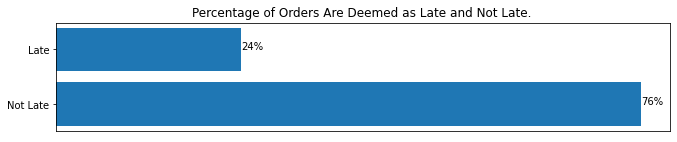

In [26]:
import matplotlib.pyplot as plt

x = list(logistics.is_late.value_counts().keys())
y = list(((logistics.is_late.value_counts().values) * 100) / len(logistics))

fig, ax = plt.subplots(figsize = (11, 2))

ax.barh(x, y)
for i, ele in enumerate(y):
    ax.text(ele, i, str(round(ele)) + '%')

plt.title("Percentage of Orders Are Deemed as Late and Not Late. ")
plt.xticks(ticks = [])
plt.xlabel
plt.show()

In [27]:
logistics["is_late"] = logistics["is_late"].map({"Late": 1, "Not Late": 0})
logistics

,orderid,pick,1st_deliver_attempt,2nd_deliver_attempt,buyeraddress,selleraddress,days_limit,1st_attempt_days,2nd_attempt_days,is_late
0,2215676524,2020-03-02,2020-03-05,0,Manila,Manila,3,3,-15708,0
1,2219624609,2020-03-04,2020-03-06,2020-03-10,Manila,Manila,3,2,3,0
2,2220979489,2020-03-04,2020-03-06,0,Manila,Manila,3,2,-15709,0
3,2221066352,2020-03-05,2020-03-07,0,Manila,Manila,3,2,-15710,0
4,2222478803,2020-03-04,2020-03-06,0,Luzon,Manila,5,2,-15709,0
...,...,...,...,...,...,...,...,...,...,...
3176308,31504087640510,2020-04-02,2020-04-04,0,Manila,Manila,3,2,-15731,0
3176309,31504147352227,2020-04-03,2020-04-06,2020-04-07,Manila,Manila,3,2,1,0
3176310,31504462290482,2020-04-02,2020-04-04,0,Manila,Manila,3,2,-15731,0
3176311,31504851495943,2020-04-03,2020-04-07,0,Luzon,Manila,5,3,-15733,0


In [28]:
submission = pd.DataFrame({'orderid': logistics["orderid"],
                           'is_late': logistics["is_late"]})
submission

,orderid,is_late
0,2215676524,0
1,2219624609,0
2,2220979489,0
3,2221066352,0
4,2222478803,0
...,...,...
3176308,31504087640510,0
3176309,31504147352227,0
3176310,31504462290482,0
3176311,31504851495943,0


In [29]:
submission.is_late.value_counts()

0    2413891
1     762422
Name: is_late, dtype: int64